In [3]:
from mxnet import ndarray as nd

In [16]:
#创建一个3行4列的数组（矩阵），并把每个元素初始化为0
x = nd.zeros((3,4))+1
x


[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]
<NDArray 3x4 @cpu(0)>

In [17]:
#同样可以将每个元素初始为1
nd.ones((3,4))+1


[[2. 2. 2. 2.]
 [2. 2. 2. 2.]
 [2. 2. 2. 2.]]
<NDArray 3x4 @cpu(0)>

In [18]:
nd.array([[1,2],[3,4]])


[[1. 2.]
 [3. 4.]]
<NDArray 2x2 @cpu(0)>

#### 创建随机数，他的元素服从均值0，方差1的正太分布

In [19]:
y = nd.random_normal(0,1,shape=(3,4))
y


[[ 0.2444218  -0.03716067 -0.48774993 -0.02261727]
 [ 0.57461417  1.4661262   0.6862904   0.35496104]
 [ 1.0731696   0.12017461 -0.9711102  -0.77569664]]
<NDArray 3x4 @cpu(0)>

In [20]:
y.shape      #数据形态

(3, 4)

In [21]:
y.size       #数据大小

12

### 操作符

In [23]:
#加法
x+y


[[1.2444218  0.9628393  0.51225007 0.9773827 ]
 [1.5746142  2.4661262  1.6862904  1.354961  ]
 [2.0731697  1.1201746  0.02888978 0.22430336]]
<NDArray 3x4 @cpu(0)>

In [24]:
#乘法
x*y


[[ 0.2444218  -0.03716067 -0.48774993 -0.02261727]
 [ 0.57461417  1.4661262   0.6862904   0.35496104]
 [ 1.0731696   0.12017461 -0.9711102  -0.77569664]]
<NDArray 3x4 @cpu(0)>

In [25]:
#指数运算
nd.exp(y)


[[1.2768828  0.9635213  0.6140064  0.9776366 ]
 [1.776445   4.33242    1.9863334  1.426125  ]
 [2.9246347  1.1276938  0.3786624  0.46038294]]
<NDArray 3x4 @cpu(0)>

In [26]:
#也可以装换一个矩阵，然后计算乘法
nd.dot(x,y.T)


[[-0.30310607  3.0819917  -0.5534626 ]
 [-0.30310607  3.0819917  -0.5534626 ]
 [-0.30310607  3.0819917  -0.5534626 ]]
<NDArray 3x3 @cpu(0)>

## 广播

In [27]:
a = nd.arange(3).reshape((3,1))
b = nd.arange(2).reshape((1,2))
print('a:',a)
print('b:',b)
print('a+b',a+b)

a: 
[[0.]
 [1.]
 [2.]]
<NDArray 3x1 @cpu(0)>
b: 
[[0. 1.]]
<NDArray 1x2 @cpu(0)>
a+b 
[[0. 1.]
 [1. 2.]
 [2. 3.]]
<NDArray 3x2 @cpu(0)>


In [30]:
x = nd.ones((3,4))
y = nd.ones((3,4))

before = id(y)
y = y+x
id(y)==before

False

In [31]:
z = nd.zeros_like(x)
before = id(z)
z[:] = x+y
id(z)==before

True

In [36]:
nd.elemwise_add(x,y,out=z)   #不会开新的内存


[[3. 3. 3. 3.]
 [3. 3. 3. 3.]
 [3. 3. 3. 3.]]
<NDArray 3x4 @cpu(0)>

# 使用autograd自动求导

In [37]:
import mxnet.ndarray as nd
import mxnet.autograd as ag

计算函数$f = 2*(x^2)$ 的导数

In [38]:
x = nd.array([[1,2],[3,4]])
x


[[1. 2.]
 [3. 4.]]
<NDArray 2x2 @cpu(0)>

In [39]:
#申请一个存放导数的空间
x.attach_grad()

In [55]:
#原函数
with ag.record():
    y = x**2
    z = 2 * y

In [56]:
z


[[ 2.  8.]
 [18. 32.]]
<NDArray 2x2 @cpu(0)>

In [57]:
#通过backward()求导
z.backward()

In [58]:
x.grad==4*x


[[1. 1.]
 [1. 1.]]
<NDArray 2x2 @cpu(0)>

### 对控制流求导

In [59]:
def f(a):
    b = a * 2
    while nd.norm(b).asscalar()<1000:
        b = b * 2
    if nd.sum(b).asscalar()>0:
        c = b
    else:
        c = 100 * b
    return c

In [67]:
X = [[1,2],[3,4]]
nd.norm(x)


[5.477226]
<NDArray 1 @cpu(0)>

In [95]:
a = nd.random_normal(shape=3)
a.attach_grad()
with ag.record():
    c = f(a)
c.backward()

In [96]:
a.grad


[1024. 1024. 1024.]
<NDArray 3 @cpu(0)>

# 从零开始线性回归

$ y[i] = 2 * X[i][0] - 3.4 * X[i][1] + 4.2 + noise$ 

In [97]:
from mxnet import ndarray as nd
from mxnet import autograd

In [115]:
num_inputs = 2
num_examples = 1000

true_w = [2,-3.4]
true_b = 4.2

x = nd.random_normal(shape=(num_examples,num_inputs))
y = true_w[0]*x[:,0]+true_w[1]*x[:,1]+true_b
y += .01 * nd.random_normal(shape=y.shape)

In [117]:
print(x[0:10],y[0:10])


[[ 0.9868496  -0.82165414]
 [ 1.1886557  -0.51751894]
 [-0.21166277 -1.0704021 ]
 [ 1.3364662   0.7727994 ]
 [-0.36800992 -0.13838674]
 [ 0.1764513   1.6834376 ]
 [-0.5515223  -1.0310302 ]
 [ 0.77013063  0.03745479]
 [ 0.96049523  0.97980016]
 [-1.2447091   0.02099029]]
<NDArray 10x2 @cpu(0)> 
[ 8.969862   8.336516   7.4148755  4.2424827  3.9493196 -1.176684
  6.6105676  5.607684   2.800961   1.6396072]
<NDArray 10 @cpu(0)>


### 数据读取

In [193]:
import random
batch_size=10
def data_iter():
    #产生一个随机索引
    idx = list(range(num_examples))
    random.shuffle(idx)
    for i in range(0,num_examples,batch_size):
        j = nd.array(idx[i:min(i+batch_size,num_examples)])
        yield nd.take(x,j),nd.take(y,j)

In [194]:
for data,label in data_iter():
    print(data,label)
    break


[[ 1.7462941  -1.1379637 ]
 [ 1.3302217   0.27381045]
 [-0.36876068 -0.34909046]
 [-0.58964324  0.44761223]
 [-0.07120118  0.29607373]
 [-0.0398103   0.1011138 ]
 [-0.92907304 -1.1821281 ]
 [ 1.451535   -0.2191933 ]
 [ 0.71011454  0.00621311]
 [ 0.1752305   0.93843824]]
<NDArray 10x2 @cpu(0)> 
[11.547254   5.9199796  4.659111   1.5110918  3.0563345  3.782608
  6.3656793  7.8369083  5.6061044  1.356926 ]
<NDArray 10 @cpu(0)>


### 初始化模型参数

In [246]:
w = nd.random_normal(shape=(num_inputs,1))
b = nd.zeros((1,))
params=[w,b]

In [247]:
for param in params:
    param.attach_grad()

### 定义模型

In [248]:
def net(X):
    return nd.dot(X,w)+b

In [249]:
net(data)


[[-1.6960987]
 [ 1.4825194]
 [ 2.1427622]
 [ 2.447693 ]
 [-2.0610032]
 [ 1.3236225]
 [-1.4332885]
 [-4.9645996]
 [-1.6052479]
 [ 3.1387608]]
<NDArray 10x1 @cpu(0)>

### 损失函数

In [250]:
def square_loss(yhat,y):
    return(yhat - y.reshape(yhat.shape)) ** 2

### 优化

In [251]:
def SGD(params,lr):
    for param in params:
        param[:] = param-lr*param.grad

### 训练

In [272]:
epochs = 5
learning_rate = 0.000001
for e in range(epochs):
    total_loss = 0
    for data,label in data_iter():
        with autograd.record():
            output = net(data)
            loss = square_loss(output,label)
        loss.backward()
        SGD(params,learning_rate)
        
        total_loss +=nd.sum(loss).asscalar()
    print('Epoch %d, average loss: %f'%(e,total_loss/num_examples))

Epoch 0, average loss: 0.000098
Epoch 1, average loss: 0.000098
Epoch 2, average loss: 0.000098
Epoch 3, average loss: 0.000098
Epoch 4, average loss: 0.000098


In [273]:
true_w,w

([2, -3.4], 
 [[ 2.0005214]
  [-3.400643 ]]
 <NDArray 2x1 @cpu(0)>)

In [274]:
true_b,b

(4.2, 
 [4.1999187]
 <NDArray 1 @cpu(0)>)

# 使用Gluon 的线性回归

### 创建数据集

In [276]:
from mxnet import ndarray as nd
from mxnet import autograd
from mxnet import gluon

num_inputs = 2
num_examples = 1000

true_w = [2,-3.4]
true_b = 4.2

x = nd.random_normal(shape=(num_examples,num_inputs))
y = true_w[0]*x[:,0]+true_w[1]*x[:,1] + true_b
y += .01 * nd.random_normal(shape=y.shape)

### 数据读取

In [468]:
batch_size = 11
dataset = gluon.data.ArrayDataset(x,y)
data_iter = gluon.data.DataLoader(dataset,batch_size,shuffle=True)

In [469]:
for data,label in data_iter:
    print(data,label)
    break


[[-0.00516136 -0.5553649 ]
 [-0.7411779   0.37856162]
 [ 0.03476851  0.308205  ]
 [ 0.825564    0.12250854]
 [-1.5541884  -1.5769162 ]
 [ 0.47021252  0.19596735]
 [ 0.09910856  0.38083875]
 [ 0.4768456  -0.72073084]
 [ 0.19930011  0.55292743]
 [-1.2961979   1.5444343 ]
 [-0.8671739  -0.14381963]]
<NDArray 11x2 @cpu(0)> 
[ 6.078939   1.4268879  3.2057924  5.4369493  6.464548   4.4696207
  3.0930123  7.612518   2.7121964 -3.6480708  2.938563 ]
<NDArray 11 @cpu(0)>


In [470]:
[print(data,label) for data,label in data_iter]


[[-1.2603213  -0.0722924 ]
 [ 0.5364311  -0.36578864]
 [ 0.29301867  2.8776112 ]
 [ 0.20758216  1.0135216 ]
 [-1.059483   -0.01117961]
 [ 0.8502537  -0.47698066]
 [-0.01181127  0.24938725]
 [ 0.8715565   1.492619  ]
 [-1.6261858  -1.3147935 ]
 [-0.43860382  1.1204971 ]
 [ 2.0350628  -0.24145696]]
<NDArray 11x2 @cpu(0)> 
[ 1.9386915   6.5158486  -5.019334    1.1625789   2.112222    7.5103335
  3.3380127   0.8534885   5.4159994  -0.48224553  9.100296  ]
<NDArray 11 @cpu(0)>

[[ 0.21348217 -1.5734211 ]
 [-0.6690833   1.6584929 ]
 [-0.01811524 -0.24186634]
 [ 1.1670026   1.7134112 ]
 [-1.5412054  -0.50197774]
 [-0.7198267   1.1003373 ]
 [-0.25744012  1.7606615 ]
 [ 0.7816787  -0.4505312 ]
 [-1.3503919  -0.13035752]
 [-1.6282419   2.322387  ]
 [-1.677746   -0.84465176]]
<NDArray 11x2 @cpu(0)> 
[ 9.971851  -2.773616   4.9840035  0.7021724  2.8184738 -0.9908676
 -2.3063052  7.2824755  1.9566283 -6.9519925  3.7416468]
<NDArray 11 @cpu(0)>

[[-0.90466684  1.8798615 ]
 [ 0.731248   -0.795008  ]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

### 定义模型

In [471]:
net = gluon.nn.Sequential()

In [472]:
net.add(gluon.nn.Dense(1))

In [473]:
net

Sequential(
  (0): Dense(None -> 1, linear)
)

### 初始化模型参数

In [474]:
net.initialize()

### 损失函数

In [478]:
square_loss = gluon.loss.L2Loss()

### 优化

In [479]:
trainer = gluon.Trainer(
    net.collect_params(),'sgd',{'learning_rate':.01})

In [482]:
epochs = 5
batch_size = 10
for e in range(epochs):
    total_loss = 0
    for data,label in data_iter:
        with autograd.record():
            output = net(data)
            loss = square_loss(output,label)
        loss.backward()
        trainer.step(batch_size)
        total_loss += nd.sum(loss).asscalar()
    print('Epoch %d, average loss: %f' %(e,total_loss/num_examples))

Epoch 0, average loss: 0.000366
Epoch 1, average loss: 0.000092
Epoch 2, average loss: 0.000055
Epoch 3, average loss: 0.000050
Epoch 4, average loss: 0.000049


In [484]:
true_b,b

(4.2, 
 [4.1999187]
 <NDArray 1 @cpu(0)>)

In [485]:
true_w,w

([2, -3.4], 
 [[ 2.0005214]
  [-3.400643 ]]
 <NDArray 2x1 @cpu(0)>)

In [488]:
dense = net[0]
true_w,dense.weight.data()

([2, -3.4], 
 [[ 1.999793  -3.3998303]]
 <NDArray 1x2 @cpu(0)>)

In [492]:
true_b,dense.bias.data()

(4.2, 
 [4.1999393]
 <NDArray 1 @cpu(0)>)

# 从零开始多类逻辑回归

In [676]:
from mxnet import gluon
from mxnet import ndarray as nd

In [677]:
def transform(data,label):
    return data.astype('float32')/255,label.astype('float32')

In [678]:
mnist_train = gluon.data.vision.FashionMNIST(train=True,transform=transform)
mnist_test = gluon.data.vision.FashionMNIST(train=False,transform=transform)

/home/zyc/anaconda3/lib/python3.6/site-packages/mxnet/gluon/data/vision/datasets.py:118: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  label = np.fromstring(fin.read(), dtype=np.uint8).astype(np.int32)
/home/zyc/anaconda3/lib/python3.6/site-packages/mxnet/gluon/data/vision/datasets.py:122: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  data = np.fromstring(fin.read(), dtype=np.uint8)


In [679]:
data,label = mnist_train[0]
('examplt shape:',data.shape,'label:',label)

('examplt shape:', (28, 28, 1), 'label:', 2.0)

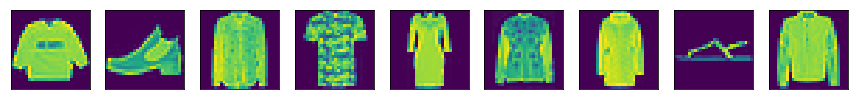

['pullover', 'ankle boot', 'shirt', 't-shirt', 'dress', 'coat', 'coat', 'sandal', 'coat']


In [680]:
import matplotlib.pyplot as plt

def show_images(images):
    n = images.shape[0]
    _,figs = plt.subplots(1,n,figsize=(15,15))
    for i in range(n):
        figs[i].imshow(images[i].reshape((28,28)).asnumpy())
        figs[i].axes.get_xaxis().set_visible(False)
        figs[i].axes.get_yaxis().set_visible(False)
    plt.show()

def get_text_labels(label):
    test_labels = [
        't-shirt','trouser','pullover','dress','coat',
        'sandal','shirt','sneaker','bag','ankle boot'
    ]
    return [test_labels[int(i)] for i in label]
data,label = mnist_train[0:9]
show_images(data)
print(get_text_labels(label))

### 数据读取

In [681]:
batch_size = 256
train_data = gluon.data.DataLoader(mnist_train,batch_size,shuffle=True)
test_data = gluon.data.DataLoader(mnist_test,batch_size,shuffle=False)

### 初始化模型参数

In [682]:
num_inputs = 784
num_outputs = 10

W = nd.random_normal(shape=(num_inputs,num_outputs))
b = nd.random_normal(shape=num_outputs)

params = [W,b]

In [683]:
for param in params:
    param.attach_grad()

### 定义模型

In [645]:
from mxnet import nd

In [646]:
def softmax(X):
    exp = nd.exp(X)
    #假设exp是矩阵，这里对行进行求和，并要求保留axis=1
    #返回（nrows,1)形状的矩阵
    partition = exp.sum(axis=1,keepdims=True)
    return exp / partition

In [647]:
x = nd.random_normal(shape=(2,5))
x_prob = softmax(x)
print(x)
print(x_prob)
print(x_prob.sum(axis=1))


[[ 0.31172857  0.27502608  0.01270027 -1.5576043   0.85842633]
 [-0.4922136  -0.21690577  0.10819669  0.08741634 -0.25648955]]
<NDArray 2x5 @cpu(0)>

[[0.21799475 0.21013884 0.16165148 0.03362057 0.3765944 ]
 [0.13906263 0.18313658 0.2534926  0.24827927 0.17602894]]
<NDArray 2x5 @cpu(0)>

[1. 1.]
<NDArray 2 @cpu(0)>


In [648]:
def net(X):
    return softmax(nd.dot(X.reshape((-1,num_imputs)),W) + b)

### 交叉熵和损失函数

In [649]:
def cross_entropy(yhat,y):
    return - nd.pick(nd.log(yhat),y)

### 计算精度

In [650]:
def accuracy(output,label):
    return nd.mean(output.argmax(axis=1)==label).asscalar()

In [651]:
def evaluate_accuracy(data_iterator,net):
    acc = 0
    for data,label in data_iterator:
        output = net(data)
        acc += accuracy(output,label)
    return acc/len(data_iterator)

In [652]:
evaluate_accuracy(test_data,net)

0.0443359375

### 训练

In [653]:
learning_rate = .01

for epoch in range(5):
    train_loss = 0.
    train_acc = 0.
    for data,label in train_data:
        with autograd.record():
            output = net(data)
            loss = cross_entropy(output,label)
        loss.backward()
        #将梯度平均，这样学习率会对batch_size 不那么敏感
        SGD(params,learning_rate/batch_size)
        
        train_loss += nd.mean(loss).asscalar()
        train_acc += accuracy(output,label)
    test_acc = evaluate_accuracy(test_data,net)
    print("Epoch %d. loss: %f, Train acc %f, Test acc %f"%(epoch,train_loss/len(train_data),train_acc/len(train_data),test_acc))

Epoch 0. loss: 8.326016, Train acc 0.162417, Test acc 0.248145
Epoch 1. loss: 4.675465, Train acc 0.314955, Test acc 0.374609
Epoch 2. loss: 3.664113, Train acc 0.416678, Test acc 0.448828
Epoch 3. loss: 3.190474, Train acc 0.472086, Test acc 0.488672
Epoch 4. loss: 2.900368, Train acc 0.507059, Test acc 0.512891


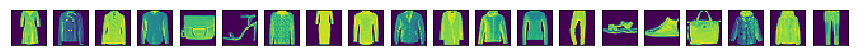

true labels
['dress', 'coat', 'coat', 'shirt', 'bag', 'sandal', 'shirt', 'dress', 'shirt', 'coat', 'coat', 'coat', 'pullover', 'trouser', 'sandal', 'sneaker', 'bag', 'coat', 'coat', 'trouser']
predicted labels
['bag', 'coat', 'coat', 'pullover', 'bag', 'sandal', 'shirt', 'dress', 'shirt', 'coat', 'coat', 'pullover', 'pullover', 'dress', 'sneaker', 'sandal', 'bag', 'shirt', 'coat', 'trouser']


In [654]:
data,label = mnist_test[10:30]
show_images(data)
print('true labels')
print(get_text_labels(label))

predicted_label = net(data).argmax(axis=1)
print('predicted labels')
print(get_text_labels(predicted_label.asnumpy()))

In [655]:
(predicted_label.asnumpy()==label).sum()/label.size

0.65

In [656]:
import math
math.exp(-1)

0.36787944117144233

# Gluon逻辑回归

In [684]:
from mxnet import gluon

net = gluon.nn.Sequential()
with net.name_scope():
    net.add(gluon.nn.Flatten())
    net.add(gluon.nn.Dense(10))
net.initialize()

### Softmax 和交叉熵函数

In [685]:
softmax_cross_entropy = gluon.loss.SoftmaxCrossEntropyLoss()

### 优化

In [695]:
trainer = gluon.Trainer(
    net.collect_params(),'SGD',{'learning_rate':0.01})

In [697]:

for epoch in range(5):
    train_loss = 0.
    train_acc = 0.
    for data,label in train_data:
        with autograd.record():
            output = net(data)
            loss = softmax_cross_entropy(output,label)
        loss.backward()
        #将梯度平均，这样学习率会对batch_size 不那么敏感
        trainer.step(batch_size)
        
        train_loss += nd.mean(loss).asscalar()
        train_acc += accuracy(output,label)
    test_acc = evaluate_accuracy(test_data,net)
    print("Epoch %d. loss: %f, Train acc %f, Test acc %f"%\
          (epoch,train_loss/len(train_data),train_acc/len(train_data),test_acc))

Epoch 0. loss: 0.776211, Train acc 0.752166, Test acc 0.756250
Epoch 1. loss: 0.735836, Train acc 0.763353, Test acc 0.766602
Epoch 2. loss: 0.704777, Train acc 0.771626, Test acc 0.777246
Epoch 3. loss: 0.679696, Train acc 0.779532, Test acc 0.784473
Epoch 4. loss: 0.659188, Train acc 0.785755, Test acc 0.790527


#### 上面开始一直使用自定义的损失导致，loss一直nan，很久才解决，自己坑了自己 = = 